<a href="https://colab.research.google.com/github/andrija-sretovic/Space-race-analysis/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format


### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_data.shape)
print(df_data.columns)

(4324, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [ ]:
print(f'Missing data: \n{df_data.isna().sum()}')
print(f'Duplicate data: {df_data.duplicated().sum()}')

Missing data: 
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
Duplicate data: 0


In [ ]:
df_data[df_data.Location == 'Site 110/37, Baikonur Cosmodrome, Kazakhstan'].sort_values('Price', ascending=False).head(20)

df_data.sort_values('Price', ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
661,661,661,MHI,"LA-Y1, Tanegashima Space Center, Japan","Mon Dec 12, 2011 01:21 UTC",H-IIA 202 | IGS-Radar 3,StatusActive,90.0,Success
458,458,458,MHI,"LA-Y1, Tanegashima Space Center, Japan","Wed Feb 17, 2016 08:45 UTC","H-IIA 202 | Astro H, Horyu 4 & Kinshachi 2 and 3",StatusActive,90.0,Success
519,519,519,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sun Feb 01, 2015 01:21 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,90.0,Success
1069,1069,1069,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sat Dec 14, 2002 01:31 UTC","H-IIA 202 | Midori 2, WEOS & Others",StatusActive,90.0,Success
530,530,530,MHI,"LA-Y1, Tanegashima Space Center, Japan","Wed Dec 03, 2014 04:22 UTC",H-IIA 202 | Hayabusa 2 & Others,StatusActive,90.0,Success
537,537,537,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Oct 07, 2014 05:16 UTC",H-IIA 202 | Himawari 8,StatusActive,90.0,Success
557,557,557,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sat May 24, 2014 03:05 UTC","H-IIA 202 | Daichi 2, SPROUT & Others",StatusActive,90.0,Success
569,569,569,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu Feb 27, 2014 18:37 UTC",H-IIA 202 | GPM-Core & Others,StatusActive,90.0,Success
620,620,620,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sun Jan 27, 2013 04:40 UTC",H-IIA 202 | IGS-Optical 5V & IGS-Radar 4,StatusActive,90.0,Success
648,648,648,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu May 17, 2012 16:39 UTC","H-IIA 202 | Shizuku, KOMPSAT 3 & Others",StatusActive,90.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Detail'], axis=1, inplace=True)
df_data.head()

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",StatusRetired,NaN,Success


## Descriptive Statistics

In [ ]:
print(f'There have been {df_data.index.shape[0]} launches. Starting from {df_data.Date.iloc[-1]} until {df_data.Date.iloc[0]}.')

There have been 4324 launches. Starting from Fri Oct 04, 1957 19:28 UTC until Fri Aug 07, 2020 05:12 UTC.


In [ ]:
print('The information we are given is The Organisation which launched the rocket. From which location. On what date. Whether the rocket is now retired or still active and whether the mission was a failure or a success.')

The information we are given is The Organisation which launched the rocket. From which location. On what date. Whether the rocket is now retired or still active and whether the mission was a failure or a success.


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launch_per_company = df_data.Organisation.value_counts()
launch_per_company.sort_values(ascending=True, inplace=True)

In [ ]:
launch_per_company_bar = px.bar(x= launch_per_company.values,
             y= launch_per_company.index,
             color=launch_per_company.values,
             orientation='h',
             title='Number of Launches per Company'
             )
launch_per_company_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Name of the Company')

launch_per_company_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status = df_data.Rocket_Status.value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
rocket_status_bar = px.bar(x=rocket_status.index,
                           y=rocket_status.values,
                           title='Current Status of the Rockets',
                           color=rocket_status.values
                           )
rocket_status_bar.update_layout(xaxis_title='Status of Rocket',
                                yaxis_title='Number of Rockets',
                                bargap=0.5,
                                bargroupgap=0.1
                                )
rocket_status_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data.Mission_Status.value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
mission_status_bar = px.bar(x=mission_status.index,
                           y=mission_status.values,
                           title='Current Status of the Rockets',
                           color=mission_status.values
                           )
mission_status_bar.update_layout(xaxis_title='Status of Rocket',
                                yaxis_title='Number of Rockets',
                                bargap=0.5,
                                bargroupgap=0.1
                                )
mission_status_bar.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data.Price = pd.to_numeric(df_data.Price.str.replace(',', ''))
df_data.sort_values('Price', ascending=False)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",StatusRetired,"5,000.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",StatusRetired,"1,160.00",Success
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",StatusRetired,"1,160.00",Success
...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success


In [ ]:
prices = df_data.Price.dropna().sort_values()


In [ ]:
prices_hist = px.histogram(prices,
                           nbins=50,
                           title='Distribution of Prices'
                           )
prices_hist.update_layout(xaxis_title='Prices',
                           yaxis_title='Number of Rockets'
                           )

prices_hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data.Location = df_data.Location.str.split(',').str[-1].str.strip()
df_data.head()

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.00,Success
1,CASC,China,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,USA,"Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.00,Success
4,ULA,USA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.00,Success


In [ ]:
replacement_mapping = {
    'Barents Sea': 'Russian Federation',
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Pacific Missile Range Facility': 'USA',
    'Gran Canaria': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran'
}

df_data['Location'] = df_data['Location'].replace(replacement_mapping)


df_data.head(10)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.00,Success
1,CASC,China,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,USA,"Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.00,Success
4,ULA,USA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.00,Success
5,CASC,China,"Sat Jul 25, 2020 03:13 UTC",StatusActive,64.68,Success
6,Roscosmos,Kazakhstan,"Thu Jul 23, 2020 14:26 UTC",StatusActive,48.50,Success
7,CASC,China,"Thu Jul 23, 2020 04:41 UTC",StatusActive,NaN,Success
8,SpaceX,USA,"Mon Jul 20, 2020 21:30 UTC",StatusActive,50.00,Success
9,JAXA,Japan,"Sun Jul 19, 2020 21:58 UTC",StatusActive,90.00,Success


In [ ]:
launch_country = df_data.Location.value_counts()
launch_country

Russian Federation    1398
USA                   1351
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Pacific Ocean           36
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
South Korea              3
Brazil                   3
Name: Location, dtype: int64

In [ ]:

launch_choro = px.choropleth(launch_country,
                    locations=launch_country.index,
                    locationmode='country names',
                    color=launch_country.values,
                    hover_name=launch_country.index,
                    color_continuous_scale='matter'
                    )
launch_choro.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures = df_data[df_data.Mission_Status == 'Failure'].groupby('Location').size().reset_index(name='Failure_Count')
failures

,Location,Failure_Count
0,Australia,3
1,Brazil,2
2,China,19
3,France,13
4,India,8
5,Iran,8
6,Israel,2
7,Japan,10
8,Kazakhstan,72
9,New Zealand,2


In [ ]:
failures_choro = px.choropleth(failures,
                    locations='Location',
                    locationmode='country names',
                    color='Failure_Count',
                    hover_name='Location',
                    color_continuous_scale='matter'
                    )
failures_choro.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
sun_chart = df_data.groupby(['Location', 'Organisation', 'Mission_Status']).agg({'Date':pd.Series.count})
sun_chart.reset_index(inplace=True)
sun_chart.rename(columns={'Date' : 'Num_of_Missions'}, inplace=True)
sun_chart

,Location,Organisation,Mission_Status,Num_of_Missions
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [ ]:
missions_sun = px.sunburst(sun_chart,
                  path=['Location','Organisation', 'Mission_Status'],
                  values='Num_of_Missions'
                  )
missions_sun.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_spent = df_data.groupby('Location').agg({'Price': pd.Series.sum}).reset_index().sort_values('Price', ascending=False)
money_spent.rename(columns={'Price': 'Total Spent'})
money_spent

,Location,Price
15,USA,"105,287.32"
3,France,"16,285.00"
8,Kazakhstan,"12,150.50"
2,China,"6,368.56"
7,Japan,"3,700.50"
13,Russian Federation,"2,189.30"
4,India,"2,177.00"
10,New Zealand,97.50
0,Australia,0.00
1,Brazil,0.00


In [ ]:
print('We can clearly see that by far the most amount spent on Space Rockets wa by the USA, whereas some country we do not have the neccessarry data')

We can clearly see that by far the most amount spent on Space Rockets wa by the USA, whereas some country we do not have the neccessarry data


In [ ]:
df_data[(df_data.Location == "USA") | (df_data.Location == "Russian Federation") | (df_data.Location == "Kazakhstan")].sort_values('Price', ascending=False).head(10)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
2000,RVSN USSR,Kazakhstan,"Fri May 15, 1987 17:30 UTC",StatusRetired,"5,000.00",Success
1916,RVSN USSR,Kazakhstan,"Tue Nov 15, 1988 03:00 UTC",StatusRetired,"5,000.00",Success
3328,NASA,USA,"Mon Jul 26, 1971 13:34 UTC",StatusRetired,"1,160.00",Success
3560,NASA,USA,"Sun May 18, 1969 16:49 UTC",StatusRetired,"1,160.00",Success
3683,NASA,USA,"Thu Apr 04, 1968 12:00 UTC",StatusRetired,"1,160.00",Partial Failure
3603,NASA,USA,"Sat Dec 21, 1968 12:51 UTC",StatusRetired,"1,160.00",Success
3716,NASA,USA,"Thu Nov 09, 1967 12:00 UTC",StatusRetired,"1,160.00",Success
3584,NASA,USA,"Mon Mar 03, 1969 16:00 UTC",StatusRetired,"1,160.00",Success
3149,NASA,USA,"Mon May 14, 1973 17:30 UTC",StatusRetired,"1,160.00",Success
3180,NASA,USA,"Tue Dec 19, 1972 19:24 UTC",StatusRetired,"1,160.00",Success


In [ ]:
print('If we include Kazakhstan in the bigger picture as it was part of the USSR at the time, \nwe see that the two most expensive launches were from there in 1987 and 1988. \nBut in general this data looks pretty bad. There is more missing than provided so no concrete conclusion can made from this.')

If we include Kazakhstan in the bigger picture as it was part of the USSR at the time, 
we see that the two most expensive launches were from there in 1987 and 1988. 
But in general this data looks pretty bad. There is more missing than provided so no concrete conclusion can made from this.


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
spent_per_launch = df_data.groupby('Organisation').agg({'Price': pd.Series.mean}).reset_index().sort_values('Price', ascending=False).dropna()
spent_per_launch

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00
19,ILS,101.54
32,MHI,95.47
34,Martin Marietta,80.16
49,US Air Force,59.65
24,JAXA,56.00


In [ ]:
df_data[df_data.Organisation == 'RVSN USSR'].sort_values('Price', ascending=False)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,Kazakhstan,"Tue Nov 15, 1988 03:00 UTC",StatusRetired,"50,000.00",Success
2000,RVSN USSR,Kazakhstan,"Fri May 15, 1987 17:30 UTC",StatusRetired,"50,000.00",Success
1299,RVSN USSR,Russian Federation,"Wed Aug 12, 1998 12:53 UTC",StatusRetired,NaN,Success
1427,RVSN USSR,Russian Federation,"Thu Aug 29, 1996 05:22 UTC",StatusRetired,NaN,Success
1497,RVSN USSR,Russian Federation,"Wed Aug 02, 1995 23:59 UTC",StatusRetired,NaN,Success
...,...,...,...,...,...,...
4301,RVSN USSR,Kazakhstan,"Tue Sep 23, 1958 07:40 UTC",StatusRetired,NaN,Failure
4313,RVSN USSR,Kazakhstan,"Thu May 15, 1958 07:12 UTC",StatusRetired,NaN,Success
4315,RVSN USSR,Kazakhstan,"Sun Apr 27, 1958 09:01 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,Kazakhstan,"Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success


In [ ]:
print('If we take the average amount of money each organisation spends per launch we see that RVSN USSR is by far the biggest spender. \nHowever if we examine data further that the price of launch is only provided for two launches and therefore we cannot know how much this orgaisation actually spends per launch.')

If we take the average amount of money each organisation spends per launch we see that RVSN USSR is by far the biggest spender. 
However if we examine data further that the price of launch is only provided for two launches and therefore we cannot know how much this orgaisation actually spends per launch.


# Chart the Number of Launches per Year

In [ ]:

df_data['New_Date'] = df_data['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce').strftime('%b %d, %Y') if pd.notna(x) else x)

df_data['Date'] = pd.to_datetime(df_data.New_Date)

df_data.drop(['New_Date'], axis=1, inplace=True)
df_data.head()



,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,USA,2020-08-07,StatusActive,50.00,Success
1,CASC,China,2020-08-06,StatusActive,29.75,Success
2,SpaceX,USA,2020-08-04,StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,2020-07-30,StatusActive,65.00,Success
4,ULA,USA,2020-07-30,StatusActive,145.00,Success


In [ ]:
per_year = df_data.Date.dt.year.value_counts().sort_index()
per_year

1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

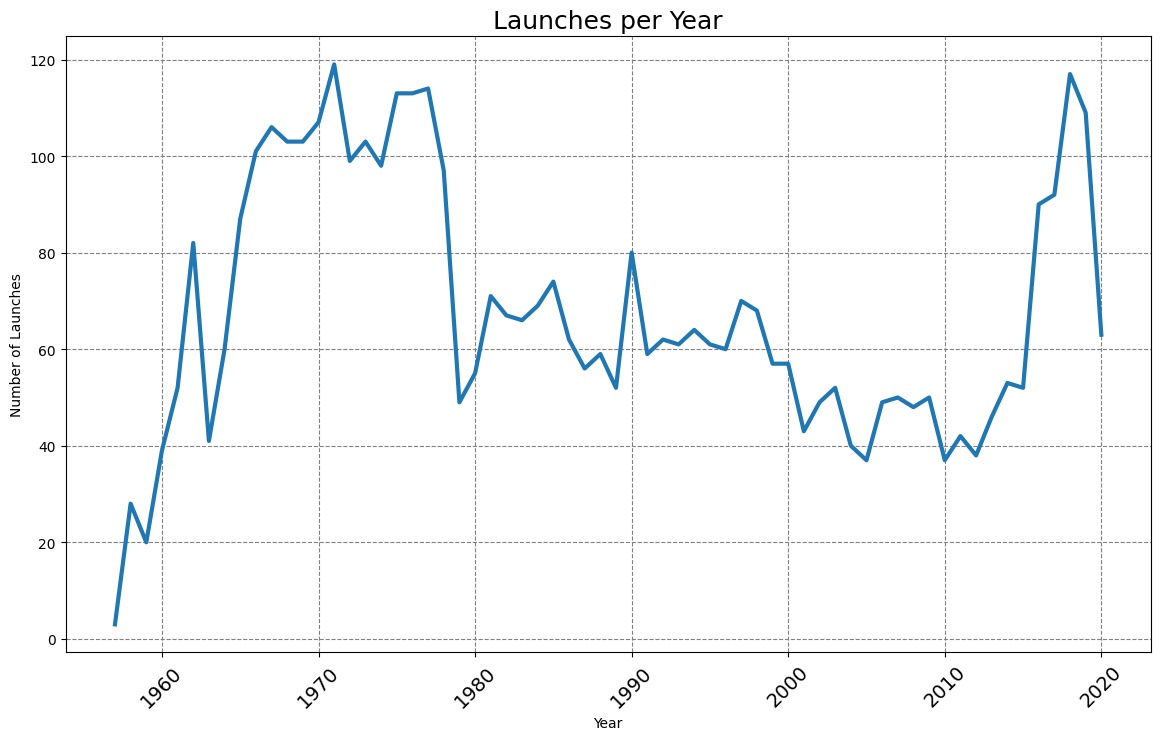

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Launches per Year', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Number of Launches')
ax.set_xlabel('Year')

ax.plot(per_year.index, per_year.values, lw=3)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
each_month = df_data.Date.dt.month.value_counts().sort_index()
each_month

1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Date, dtype: int64

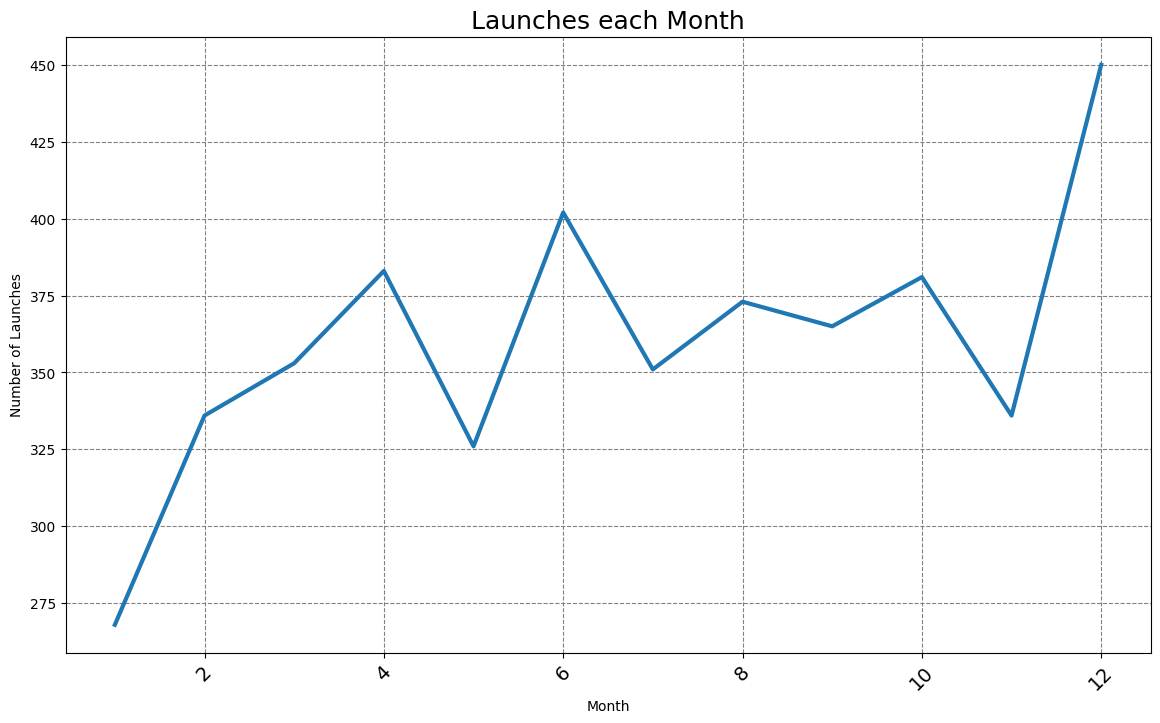

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Launches each Month', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Number of Launches')
ax.set_xlabel('Month')

ax.plot(each_month.index, each_month.values, lw=3)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
each_month_US = df_data[df_data.Location == 'USA'].Date.dt.month.value_counts().sort_index()
each_month_RU = df_data[df_data.Location == 'Russian Federation'].Date.dt.month.value_counts().sort_index()
each_month_KZ = df_data[df_data.Location == 'Kazakhstan'].Date.dt.month.value_counts().sort_index()
print(each_month_US)
print(each_month_RU)
print(each_month_KZ)

1      87
2     104
3     115
4     128
5     116
6     130
7      99
8     125
9     110
10    105
11    106
12    126
Name: Date, dtype: int64
1      92
2      93
3     121
4     119
5     100
6     149
7     124
8      98
9     105
10    129
11    104
12    164
Name: Date, dtype: int64
1     33
2     46
3     61
4     73
5     46
6     61
7     64
8     67
9     54
10    75
11    52
12    69
Name: Date, dtype: int64


In [ ]:
print('We see that December is the most popular month to launch a rocket. On the hand January is the lowest, almost half of December.\n June is the second most popular month.')

We see that December is the most popular month to launch a rocket. On the hand January is the lowest, almost half of December.
 June is the second most popular month.


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
price_years = df_data.groupby(df_data.Date.dt.year).agg({'Price': pd.Series.mean}).sort_index()
price_years

,Price
Date,
1957,NaN
1958,NaN
1959,NaN
1960,NaN
1961,NaN
...,...
2016,79.46
2017,69.49
2018,64.75


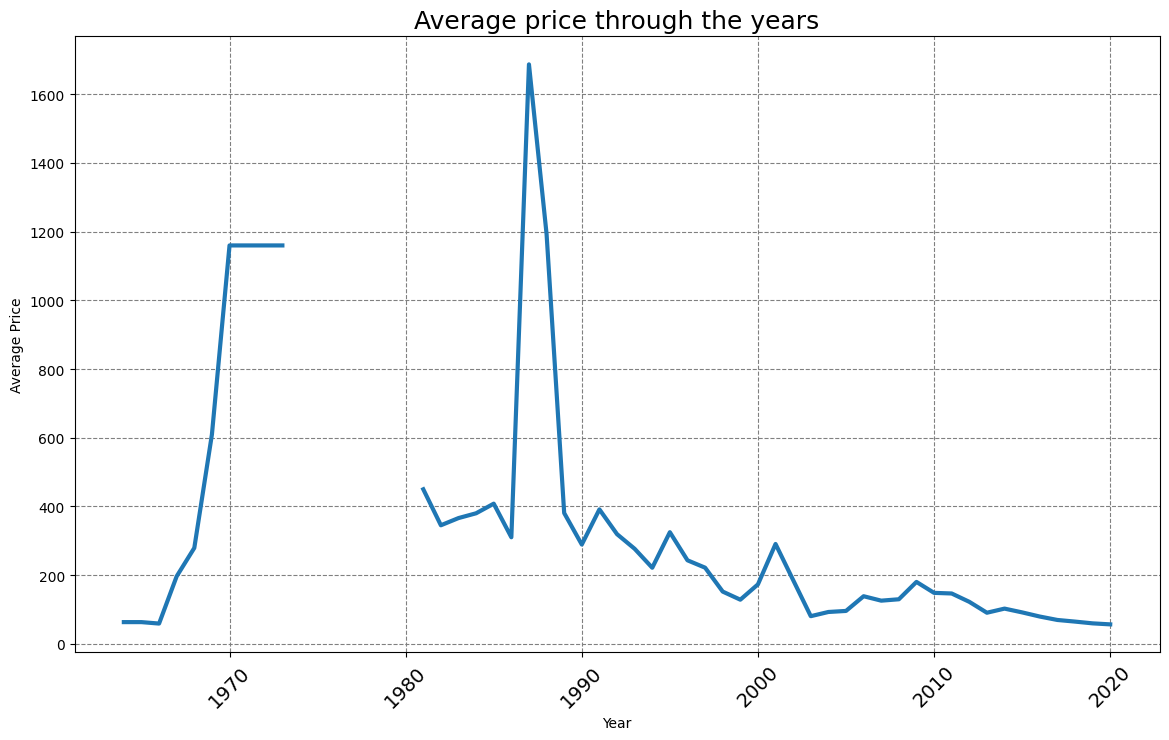

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Average price through the years', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')
ax.set_ylabel('Average Price')
ax.set_xlabel('Year')

ax.plot(price_years.index, price_years.values, lw=3)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top10 = df_data.groupby('Organisation').agg({'Date': pd.Series.count}).sort_values('Date', ascending=False).head(10)
top10

,Date
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [ ]:
top10_data = df_data[df_data.Organisation.isin(top10.index)]
top10_data

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
1,CASC,China,2020-08-06,StatusActive,29.75,Success
4,ULA,USA,2020-07-30,StatusActive,145.00,Success
5,CASC,China,2020-07-25,StatusActive,64.68,Success
7,CASC,China,2020-07-23,StatusActive,NaN,Success
12,CASC,China,2020-07-09,StatusActive,29.15,Success
...,...,...,...,...,...,...
4307,US Air Force,USA,1958-08-17,StatusRetired,NaN,Failure
4313,RVSN USSR,Kazakhstan,1958-05-15,StatusRetired,NaN,Success
4315,RVSN USSR,Kazakhstan,1958-04-27,StatusRetired,NaN,Failure
4322,RVSN USSR,Kazakhstan,1957-11-03,StatusRetired,NaN,Success


In [ ]:
# yearly = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
# yearly

yearly = top10_data.groupby(['Organisation', 'Date'], as_index=False).count()
yearly = yearly.sort_values('Date')[['Organisation', 'Date', 'Mission_Status']]
yearly.rename(columns={'Mission_Status' : 'Launches'}, inplace=True)

yearly

,Organisation,Date,Launches
1229,RVSN USSR,1957-10-04,1
1230,RVSN USSR,1957-11-03,1
1231,RVSN USSR,1958-04-27,1
1232,RVSN USSR,1958-05-15,1
3024,US Air Force,1958-08-17,1
...,...,...,...
658,CASC,2020-07-09,1
659,CASC,2020-07-23,1
660,CASC,2020-07-25,1
3023,ULA,2020-07-30,1


In [ ]:
top10_by_date  = yearly.groupby(by=['Organisation', 'Date']).sum().groupby(level=[0]).cumsum()
top10_by_date .reset_index(inplace=True)
top10_by_date

,Organisation,Date,Launches
0,Arianespace,1984-05-23,1
1,Arianespace,1984-08-04,2
2,Arianespace,1984-11-10,3
3,Arianespace,1985-02-08,4
4,Arianespace,1985-05-08,5
...,...,...,...
3374,VKS RF,2019-12-11,197
3375,VKS RF,2019-12-26,198
3376,VKS RF,2020-02-20,199
3377,VKS RF,2020-03-16,200


In [ ]:
top10_line = px.line(top10_by_date,
               x='Date',
               y='Launches',
               color='Organisation',
               title='Number of Lauches for top 10 organisations through the years!')

top10_line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
coldwar_df = df_data[(df_data.Date.dt.year <= 1991) & ((df_data.Location == 'USA') | (df_data.Location == 'Russian Federation') | (df_data.Location == 'Kazakhstan'))]
coldwar_df['Location'] = coldwar_df['Location'].replace({'Russian Federation': 'USSR',
                                                         'Kazakhstan': 'USSR'})
coldwar_df

<ipython-input-138-7fe3d7cfde71>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
1718,RVSN USSR,USSR,1991-12-20,StatusRetired,NaN,Success
1719,Yuzhmash,USSR,1991-12-18,StatusRetired,NaN,Success
1721,General Dynamics,USA,1991-12-07,StatusRetired,NaN,Success
1722,General Dynamics,USA,1991-11-28,StatusRetired,NaN,Success
1723,RVSN USSR,USSR,1991-11-27,StatusRetired,NaN,Success
...,...,...,...,...,...,...
4319,US Navy,USA,1958-02-05,StatusRetired,NaN,Failure
4320,AMBA,USA,1958-02-01,StatusRetired,NaN,Success
4321,US Navy,USA,1957-12-06,StatusRetired,NaN,Failure
4322,RVSN USSR,USSR,1957-11-03,StatusRetired,NaN,Success


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
cw_countries = coldwar_df.Location.value_counts()
cw_countries

USSR    1770
USA      662
Name: Location, dtype: int64

In [ ]:
coldwar_pie = px.pie(names=cw_countries.index,
                     values=cw_countries.values,
                     title='Number of rockets launched by USSR and USA'
                     )

coldwar_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
cw_yearly = coldwar_df.groupby([coldwar_df.Date.dt.year, 'Location']).agg({'Organisation': pd.Series.count})
cw_yearly.reset_index(inplace=True)
cw_yearly.rename(columns={'Organisation': 'Launches'}, inplace=True)
cw_yearly

,Date,Location,Launches
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
65,1989,USSR,26
66,1990,USA,26
67,1990,USSR,37
68,1991,USA,18


In [ ]:
cw_line = px.line(cw_yearly,
               x='Date',
               y='Launches',
               color='Location',
               title='Number of Rockets Launched by USA and USSR during the cold war'
               )
cw_line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
failed_misions = df_data[df_data.Mission_Status == 'Failure'].groupby(df_data.Date.dt.year).size().reset_index(name='Failure_Count')
failed_misions

,Date,Failure_Count
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


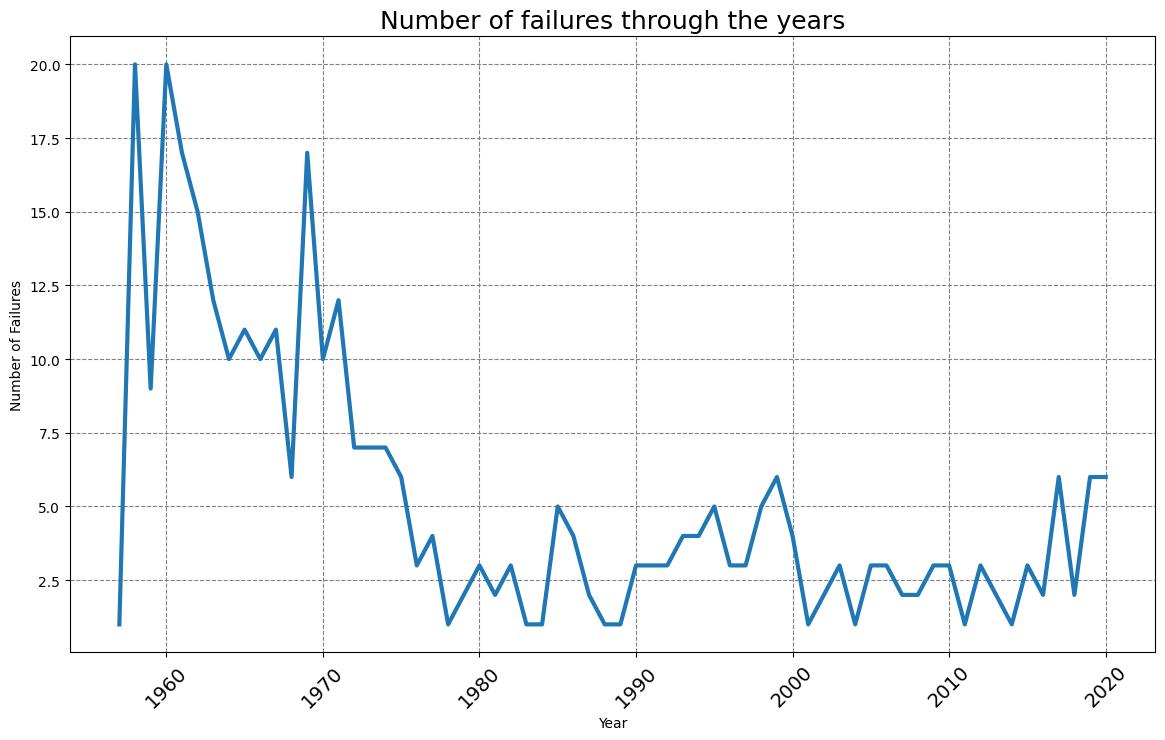

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Number of failures through the years', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')

ax.set_ylabel('Number of Failures')
ax.set_xlabel('Year')

ax.plot(failed_misions.Date, failed_misions.Failure_Count, lw=3)

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
yearly_launches = per_year.to_frame()
yearly_launches.reset_index(inplace=True)
yearly_launches.rename(columns={'index':'Date', 'Date':'Launches'}, inplace=True)
yearly_launches

,Date,Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [ ]:
merged = yearly_launches.merge(failed_misions, on='Date')
merged['Fail_Pct'] = merged.Failure_Count / merged.Launches * 100
merged

,Date,Launches,Failure_Count,Fail_Pct
0,1957,3,1,33.33
1,1958,28,20,71.43
2,1959,20,9,45.00
3,1960,39,20,51.28
4,1961,52,17,32.69
...,...,...,...,...
59,2016,90,2,2.22
60,2017,92,6,6.52
61,2018,117,2,1.71
62,2019,109,6,5.50


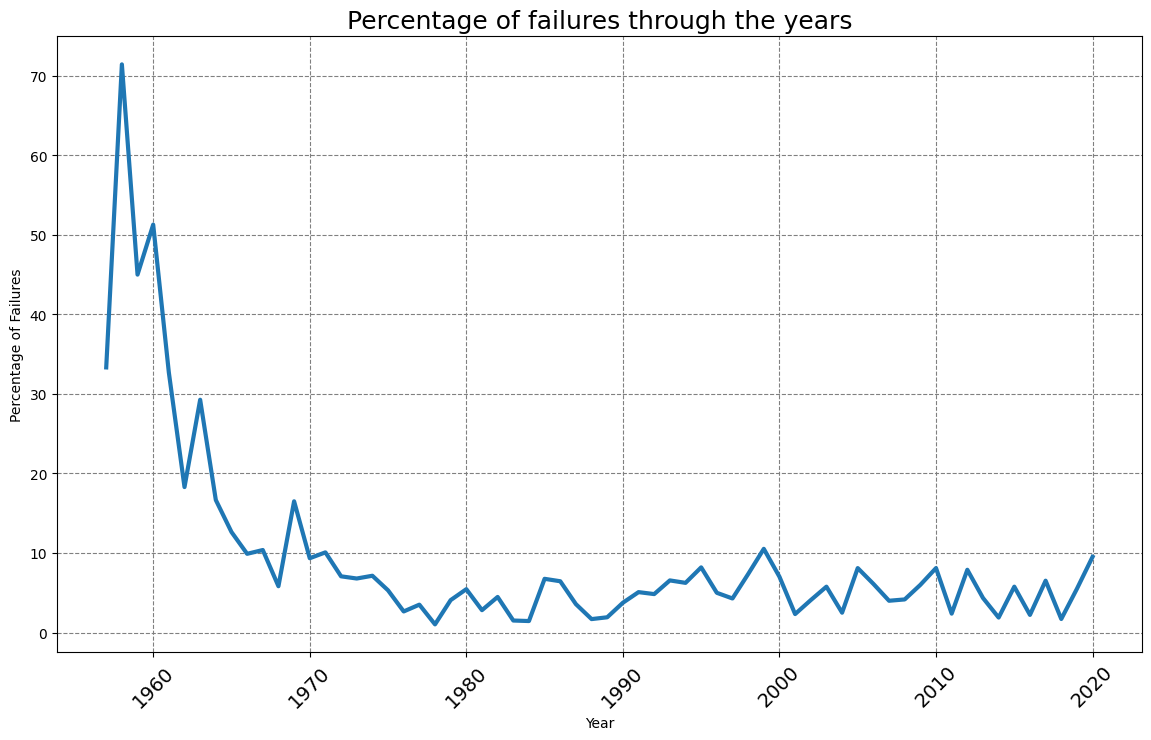

In [ ]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Percentage of failures through the years', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
ax.grid(color='grey', linestyle='--')

ax.set_ylabel('Percentage of Failures')
ax.set_xlabel('Year')

ax.plot(merged.Date, merged.Fail_Pct, lw=3)

plt.show()

In [ ]:
print('We can clearly see that as time went by that the percntage of failures droped drasticaly. It has been under 10 percent from the early seventies')

We can clearly see that as time went by that the percntage of failures droped drasticaly. It has been under 10 percent from the early seventies


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
df_data['Year'] = df_data['Date'].dt.year

# Group by 'Year' and 'Location', then count occurrences
launches_yearly = df_data.groupby(['Year', 'Location']).size().reset_index(name='Launches')

# Find the country with the most occurrences for each year
max_launches = launches_yearly.groupby('Year')['Launches'].idxmax()
most_launches_per_year = launches_yearly.loc[max_launches]




In [ ]:
# For just the succesfull launches
launches_yearly_suc = df_data[df_data.Mission_Status == 'Success'].groupby(['Year', 'Location']).size().reset_index(name='Suc_Launches')

# Find the country with the most occurrences for each year
max_launches_suc = launches_yearly_suc.groupby('Year')['Suc_Launches'].idxmax()
most_launches_per_year_suc = launches_yearly_suc.loc[max_launches_suc]
most_launches_per_year_suc

,Year,Location,Suc_Launches
0,1957,Kazakhstan,2
2,1958,USA,5
4,1959,USA,6
6,1960,USA,16
8,1961,USA,27
...,...,...,...
353,2016,USA,26
360,2017,USA,30
361,2018,China,38
369,2019,China,32


In [ ]:
merged_suc = most_launches_per_year.merge(most_launches_per_year_suc, on='Year')
merged_suc

,Year,Location_x,Launches,Location_y,Suc_Launches
0,1957,Kazakhstan,2,Kazakhstan,2
1,1958,USA,23,USA,5
2,1959,USA,16,USA,6
3,1960,USA,30,USA,16
4,1961,USA,43,USA,27
...,...,...,...,...,...
59,2016,USA,27,USA,26
60,2017,USA,30,USA,30
61,2018,China,39,China,38
62,2019,China,34,China,32


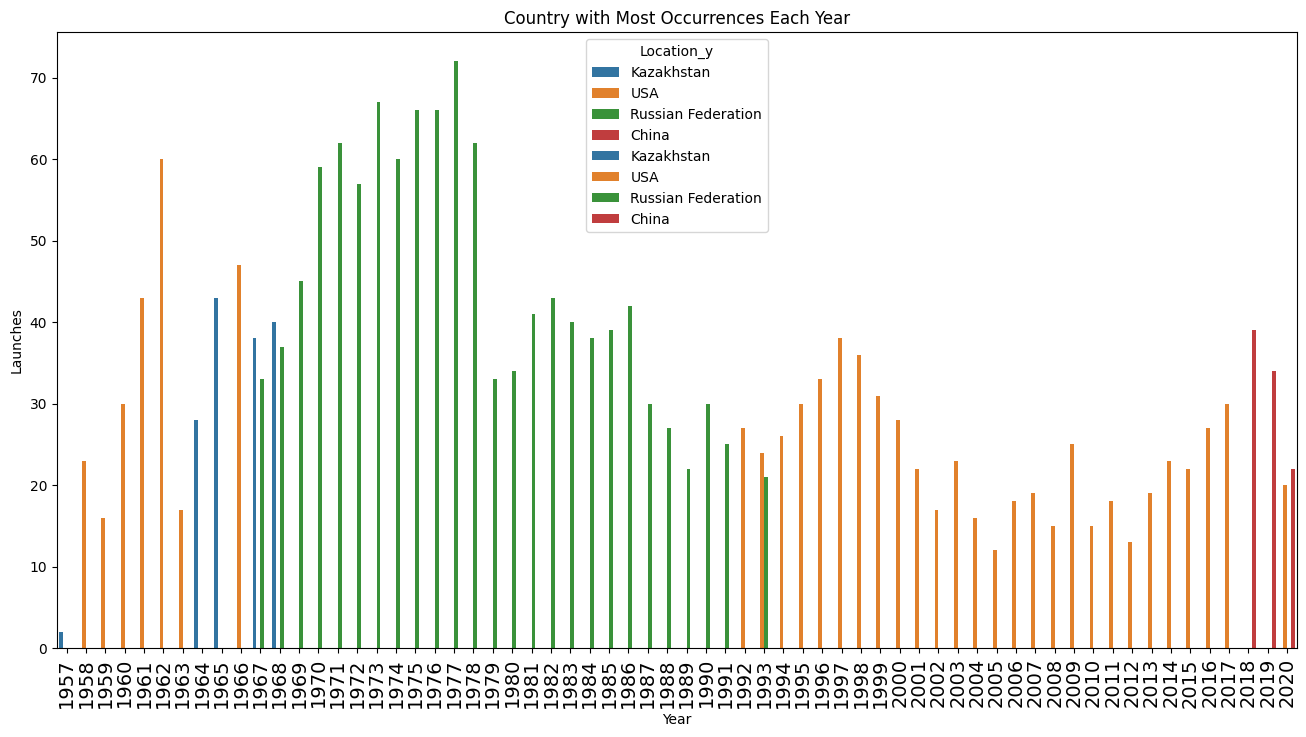

In [ ]:
plt.figure(figsize=(16, 8))
plt.xticks(fontsize=14, rotation=90)

sns.barplot(merged_suc,
            x='Year',
            y='Launches',
            hue='Location_x'
            )
sns.barplot(merged_suc,
            x='Year',
            y='Suc_Launches',
            hue='Location_y'
            )

plt.title('Country with Most Occurrences Each Year')
plt.xlabel('Year')
plt.ylabel('Launches')
plt.show()

In [ ]:
print('We can see that as we plot succesfull and total number of launches we can see that few years there is diffrence in a \ncountry that the most launches and the most successfull launches')

We can see that as we plot succesfull and total number of launches we can see that few years there is diffrence in a 
country that the most launches and the most successfull launches


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
print('From the above charts we can see the USA had the advantage in the late 50s and early 60s.\nMid 60s and all the way to the end of the cold war, the USSR dominated the number of rockets they have launched.\nAt this point the USA takes over again up until recently.\nWe can see that in the last couple of years that China is starting to dominate the space landscape.')

From the above charts we can see the USA had the advantage in the late 50s and early 60s.
Mid 60s and all the way to the end of the cold war, the USSR dominated the number of rockets they have launched.
At this point the USA takes over again up until recently.
We can see that in the last couple of years that China is starting to dominate the space landscape.
